In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

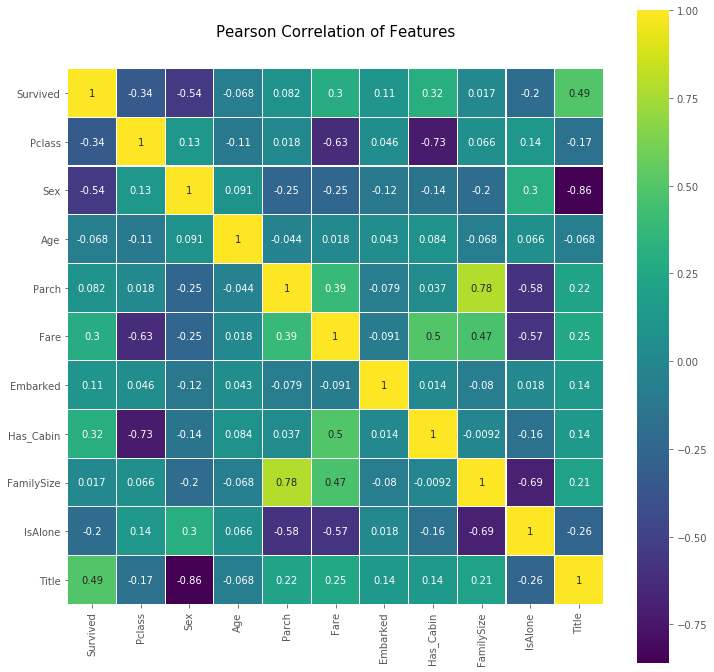

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Exploratory Data Analysis

## Survived

In [20]:
Survived = train[['Survived']].groupby('Survived').size().reset_index(name='Number').set_index('Survived')
#Survived.columns = ['No', 'Yes']
#Survived.index = ['Number']
Survived.T

Survived,0,1
Number,549,342


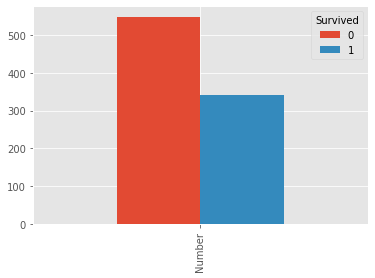

In [21]:
Survived.T.plot(kind = 'bar')

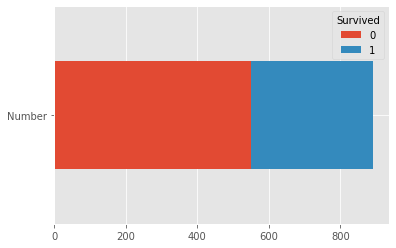

In [22]:
Survived.T.plot(kind = 'barh', stacked = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


(-1.110527929435086,
 1.1005013696949746,
 -1.1211356887777435,
 1.113757540143789)

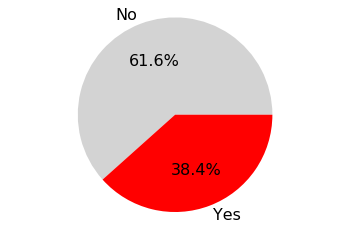

In [23]:
plt.pie(Survived, labels = ['No', 'Yes'], autopct='%1.1f%%', colors = ['lightgrey', 'red'], textprops={'fontsize': 16})
plt.axis('equal')

## Embarked

In [24]:
Embarked = train[['Embarked']].groupby('Embarked').size().reset_index(name='Number').set_index('Embarked')
Embarked.T

Embarked,0,1,2
Number,646,168,77


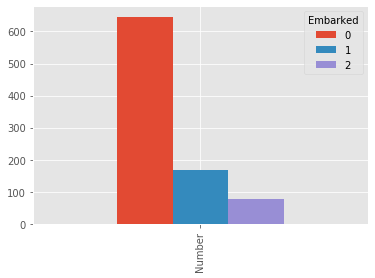

In [25]:
Embarked.T.plot( kind = 'bar')

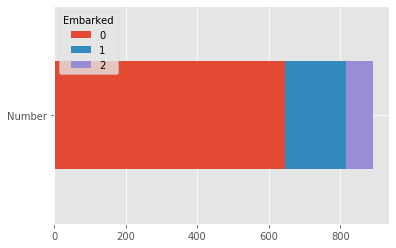

In [26]:
Embarked.T.plot(kind = 'barh', stacked = True)

## Age

In [27]:
age = train[['Age']].groupby('Age').size().reset_index(name='number').set_index('Age')
age.head()

,number
Age,
0,108
1,449
2,254
3,69
65,3


Text(0, 0.5, 'Number')

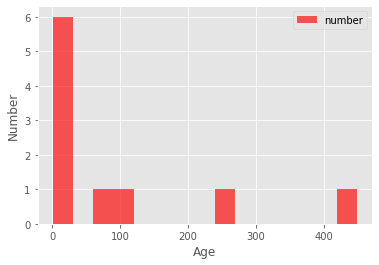

In [28]:
age.plot.hist(bins = 15, alpha = 0.65, color = 'red')
plt.xlabel("Age") 
plt.ylabel("Number")

## Fare

In [29]:
fare = train[['Fare']].groupby('Fare').size().reset_index(name='number').set_index('Fare')
fare.head()

,number
Fare,
0,223
1,217
2,229
3,222


Text(0, 0.5, 'Number')

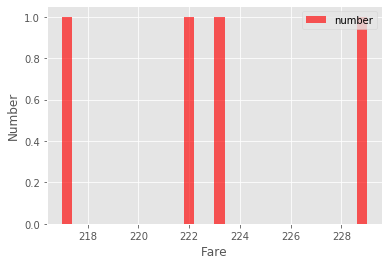

In [30]:
fare.plot.hist(bins = 30, linewidth = 1.2, alpha = 0.65, color = 'red')
plt.xlabel("Fare") 
plt.ylabel("Number")

## Sex

In [31]:
sex = train[['Sex']].groupby('Sex').size().reset_index(name='number').set_index('Sex')
sex.head()

,number
Sex,
0,314
1,577


(array([0, 1]), <a list of 2 Text xticklabel objects>)

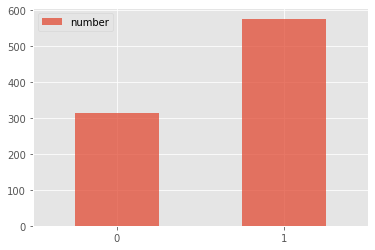

In [32]:
sex.plot(kind = 'bar', alpha = 0.75)
plt.xlabel("") 
plt.ylabel("")
plt.xticks(rotation=0)

# Pclass

In [33]:
pclass = train[['Pclass']].groupby('Pclass').size().reset_index(name='Number').set_index('Pclass')
pclass

,Number
Pclass,
1,216
2,184
3,491


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

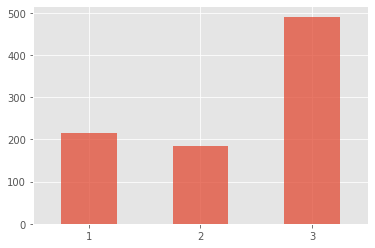

In [34]:
pclass.plot( kind = 'bar', alpha = 0.75, legend = None)
plt.xlabel("") 
plt.ylabel("")
plt.xticks(rotation=0)

## Survival Rate under Different Conditions

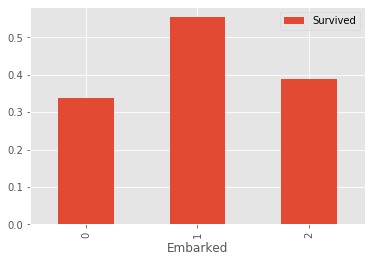

In [35]:
train[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind = 'bar')

In [36]:
train[['SibSp', 'Survived']].groupby('SibSp').mean().plot(kind = 'bar')

KeyError: "['SibSp'] not in index"

In [ ]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = 'bar')

In [ ]:
train[['Sex', 'Survived']].groupby('Sex').mean().plot(kind = 'bar')

In [37]:
train.pivot_table('Survived', index = 'Pclass', columns = 'Sex', aggfunc = 'mean', margins = True)

Sex,0,1,All
Pclass,,,
1,0.968085,0.368852,0.629630
2,0.921053,0.157407,0.472826
3,0.500000,0.135447,0.242363
All,0.742038,0.188908,0.383838
